# Tarea II Data Analitycs

---


**Alumnos:
Osvaldo Ceballos /
Felipe Gonzalez /
Juan Ignacio Paredes**

In [0]:
#!pip install -U pandas-profiling

# **1. Obtencion de Datos**

---
Cargamos los datos en Google Drive.


In [144]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [145]:
!ls "/gdrive/My Drive"

 11-11-2013.gdoc
'23-9-2013 (1).docx.gdoc'
 23-9-2013.docx.gdoc
'26 NOVIEMBRE.ppt'
 28-10-2013.gdoc
 Apéndice1_CostosFlisol2012.gsheet
 arq1_mcu2012.gdraw
'Avance Tareas Observaciones SBIF N°1.1.xls'
'Avance Tareas Observaciones SBIF N°1.1.xlsx'
'Avance Tareas Observaciones SBIF N°1.xlsx'
'ayuda desición.gsheet'
 Ayudantias
 BBVA
'BBVA Arqueo TOTAL (1).gantter'
'BBVA Arqueo TOTAL.gantter'
 biblia3peersTraficoFiltrado
 Bienvenidos_MPAZ_OSVALDO.pdf
'Bitacora Tablas Feliz Navidad Campaña Ene - 19.gsheet'
'Buyer Persona (1).docx'
'Buyer Persona (1).docx.gdoc'
 CANVAS-Franciones.gdraw
 captura-osvaldo-biblia-3peers-13-05-13.pcap
'Carta a Giadach.gdoc'
'carta dalbosco.pdf'
 CASA
'Case study.gslides'
'CBG - Calzador.gsheet'
'CGL Platas.gsheet'
'Clase de memoria Arquitectura de computadores.gdoc'
'Colab Notebooks'
 Compras
'conteo invitados 29  (pe).gsheet'
 CONVENIOS.emf
 CONVENIOS.pdf
'copia de solemne pagina alumno (1).gsheet'
'copia de solemne pagina alumno.gsheet'
'Copy of 11-11-2013 (

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling
from google.colab import files

#Seteamos el seed de manera fija
import random
random.seed(3)

#Graficas
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from keras.models import Sequential
#from keras.layers.core import Dense
#from keras.optimizers import SGD
#from keras.regularizers import l2

# Ayudas para KDD
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import preprocessing as ppr 

# Modelos
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression as logit
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn import neighbors as knn 
from sklearn.neural_network import MLPClassifier as mlp
import xgboost as xgb

In [147]:
#Traemos los dos archivos con los que trabajaremos, la base de entrenamiento y la base de testeo. 
df_training = pd.read_csv('/gdrive/My Drive/MIT/BASEFUGA_GENERAL.csv',sep=',')
df_validacion = pd.read_csv('/gdrive/My Drive/MIT/BASEFUGA_VALIDACION.csv',sep=',')

#Seteamos el ID de la base de entrenamiento como indice para separar las variables dependientes de la indepentiente.
df_training.set_index('ID', inplace = True)
df_validacion.set_index('ID', inplace = True)

df_training.info()
df_training.head()
#La base de entrenamiento cuenta con 19 columnas y 2294 registros. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 1 to 2294
Data columns (total 19 columns):
GENERO          2283 non-null object
RENTA           2294 non-null int64
EDAD            2292 non-null float64
NIV_EDUC        2283 non-null object
E_CIVIL         2283 non-null object
COD_OFI         2294 non-null int64
COD_COM         2291 non-null float64
CIUDAD          2291 non-null object
D_Marzo         2294 non-null int64
D_Abril         2294 non-null int64
D_Mayo          2294 non-null int64
D_Junio         2294 non-null int64
D_Julio         2294 non-null int64
D_Agosto        2294 non-null int64
D_Septiembre    2294 non-null int64
M_MOROSO        2294 non-null int64
MONTO           2294 non-null int64
SEGURO          2294 non-null object
FUGA            2294 non-null object
dtypes: float64(2), int64(11), object(6)
memory usage: 358.4+ KB


,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
ID,,,,,,,,,,,,,,,,,,,
1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA


# **2. Analisis Exploratorio**



### 2.0 Pandas Profiling

In [148]:
#pandas_profiling.ProfileReport(df_training)
#Con esto hacemos el output a un archivo html en el wd
pandas_profiling.ProfileReport(df_training)
#pandas_profiling.report.to_file(outputfile="output.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,20
Number of observations,2294
Total Missing (%),0.1%
Total size in memory,358.6 KiB
Average record size in memory,160.1 B
Numeric,14
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## 2.1 Variable Objetivo

---
Analisamos si nuestra variable objetivo 'FUGA', esta lo suficientemente balanceada, esto es importante, ya que queremos que el modelo sea capaz de identificar ambas clases y no puramente la predominante. 


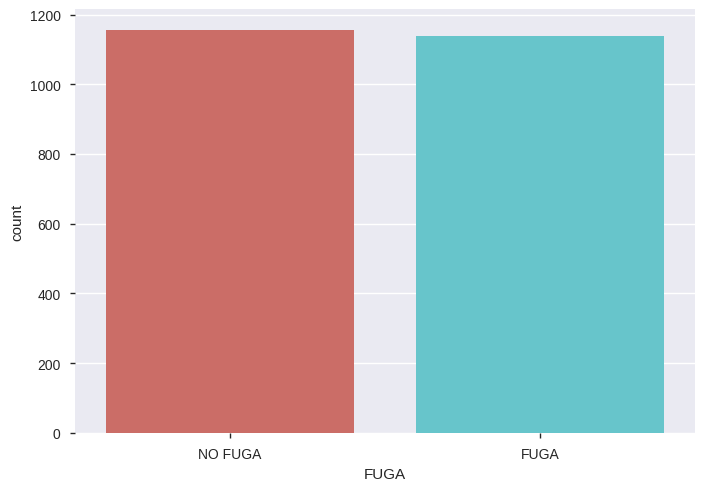

In [149]:
sns.countplot(x=df_training['FUGA'],palette='hls')
plt.show()

## 2.2 Variables Numericas

---
A continuacion haremos un analisis de estadistica descriptiva de cada variable numerica. 


2292

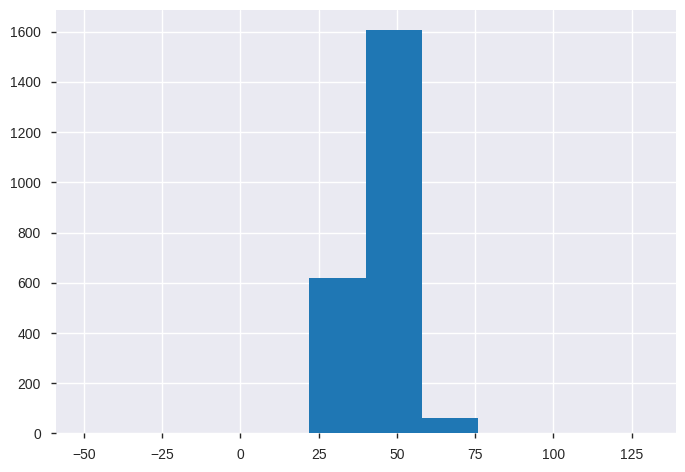

In [150]:
#EADA
df_training.EDAD.hist()
df_training.EDAD.count()

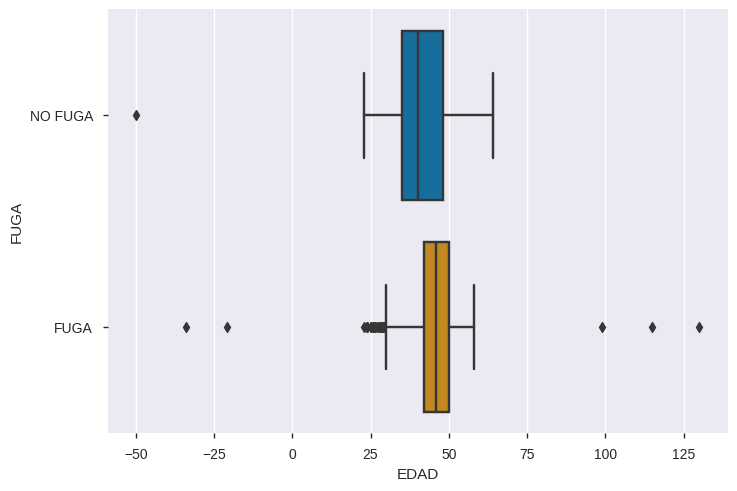

In [151]:
#EDAD
#e grouped boxplot
sns.boxplot(y='FUGA', x='EDAD', 
                 data=df_training, 
                 palette="colorblind")

                 


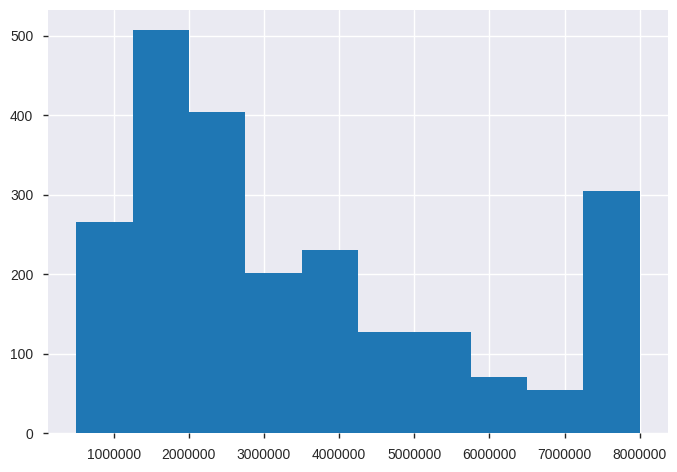

In [152]:
#MONTO
df_training.MONTO.hist()

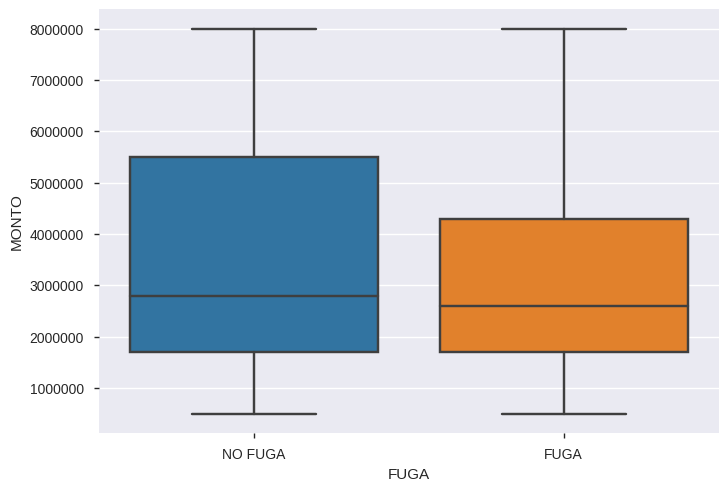

In [153]:
#MONTO
sns.boxplot(x='FUGA', y='MONTO', data = df_training)
#Podemos ver que los clientes con FUGA en promedio tienen ofertas de montos pre aprobados menores que los clientes no fugados.

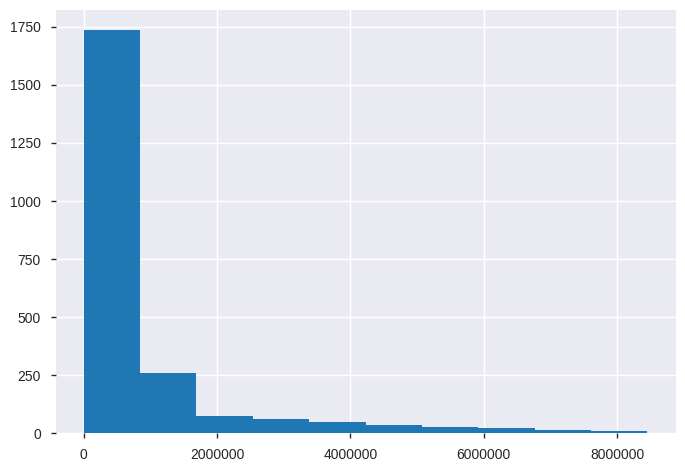

In [154]:
#RENTA
df_training.RENTA.hist()

Para RENTA podemos ver que hay una cola muy pronunciada hacia la derecha, esto lo podriamos corregir aplicando una transformacion Logaritmo sobre esta variable con el objetivo de estirar la distribucion.  

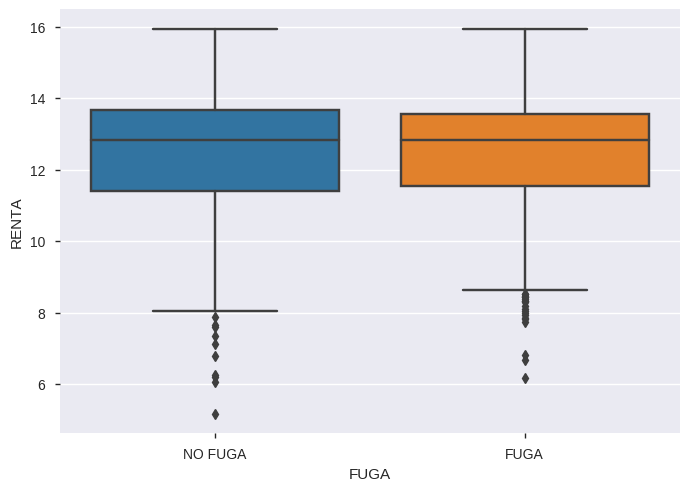

In [155]:
#RENTA
sns.boxplot(x=df_training['FUGA'], y=np.log(df_training['RENTA']))

Para ver el Boxplot de Renta sobre Fuga aplicamos Logaritmo a Renta, para tener una escala mejor y que los boxplots se puedieran leer. En un principio no vemos mayores diferencia entre ambas clases de FUGA sobre la renta promedio. 

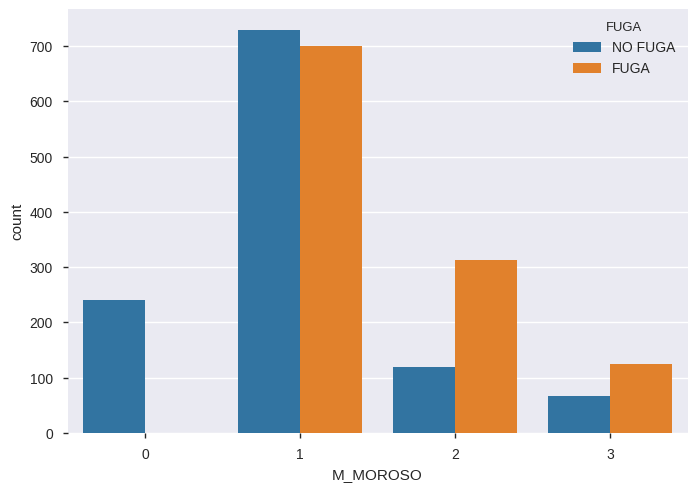

In [156]:
#M_MOROSO
ax = sns.countplot(x=df_training.M_MOROSO, hue=df_training.FUGA, data=df_training)
plt.show()

In [0]:
#DEUDAS MENSUALES


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc050f7f2e8>,
      dtype=object)

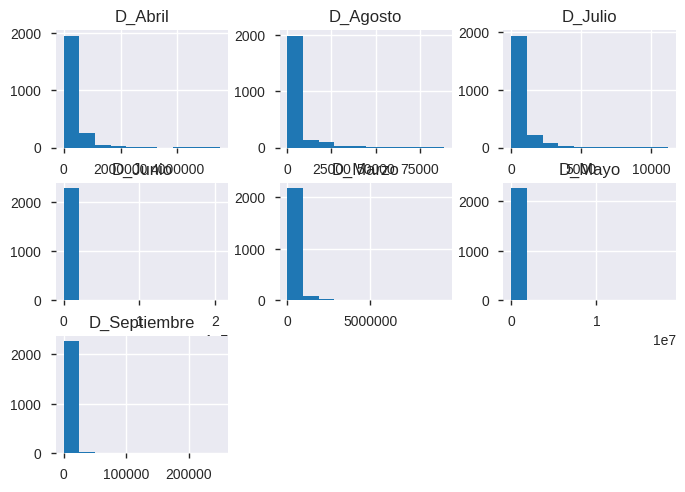

In [157]:
#DEUDAS MENSUALES

df_deudas = df_training[['D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio', 'D_Agosto', 'D_Septiembre', 'FUGA']].copy()
df_deudas.groupby('FUGA').mean()
df_deudas.hist()

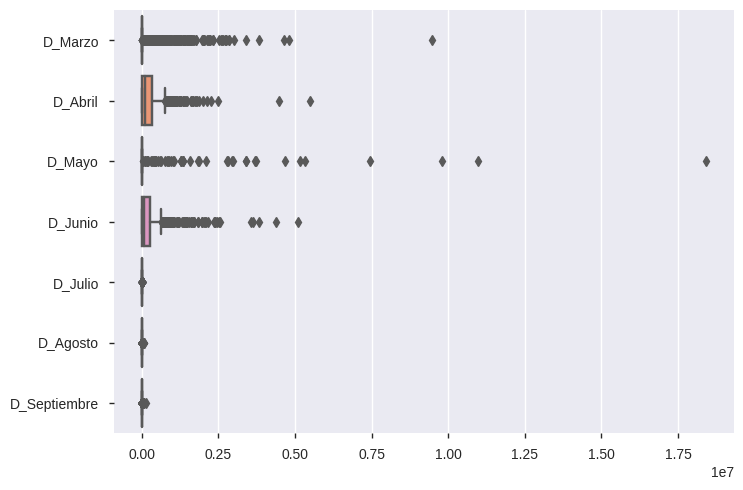

In [158]:
#DEUDAS MENSUALES para "clientes FUGA"
ax = sns.boxplot(data=df_deudas[df_deudas.FUGA =='FUGA'], orient='h', palette='Set2')

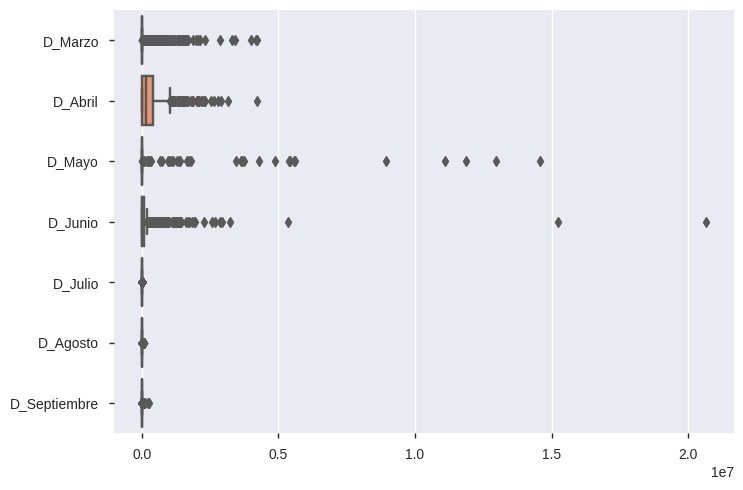

In [159]:
#DEUDAS MENSUALES para "clientes NO FUGA"
ax = sns.boxplot(data=df_deudas[df_deudas.FUGA =='NO FUGA'], orient='h', palette='Set2')

Revisando los histogramas, medias y boxplots de las variables de deuda, en primer lugar, nos damos cuenta que hay variables en escalas diferentes. En segundo lugar, no vemos mayores diferencias entre ambas clases de FUGA sobre las deudas. 

## 2.3 Variables Categoricas

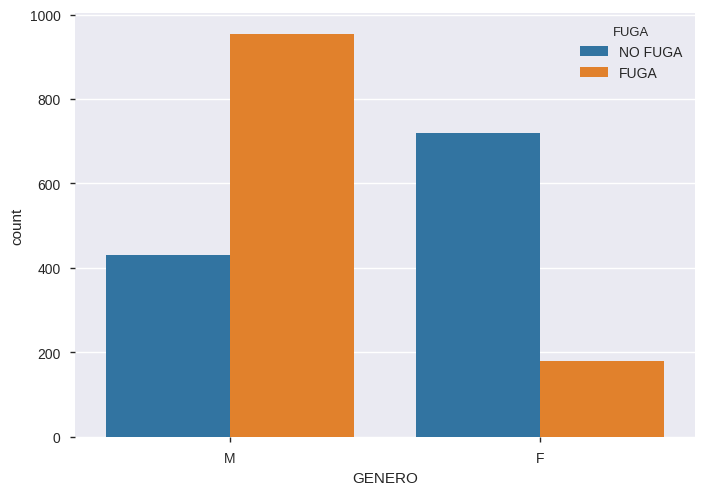

In [160]:
#GENERO
ax = sns.countplot(x=df_training.GENERO, hue=df_training.FUGA, data=df_training)
plt.show()

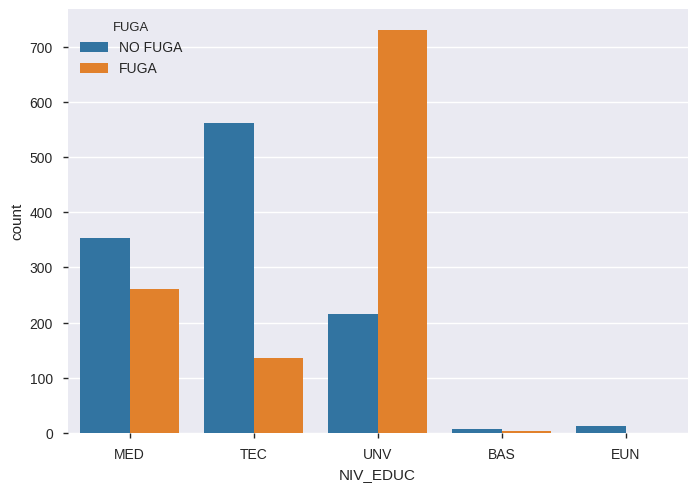

In [161]:
#NIV_EDUC
#Podemos ver en el grafico a continuacion que hay diferentes proporciones entre clientes fugados para cada tipo de Nivel Educacional, por lo que podria ser una buena variable. La mantenemos.
ax = sns.countplot(x=df_training.NIV_EDUC, hue=df_training.FUGA, data=df_training)
plt.show()

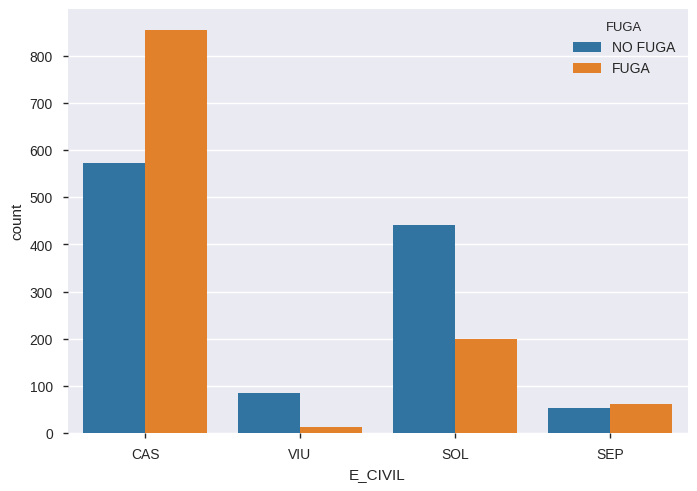

In [162]:
#E_CIVIL
ax = sns.countplot(x=df_training.E_CIVIL, hue=df_training.FUGA, data=df_training)
plt.show()

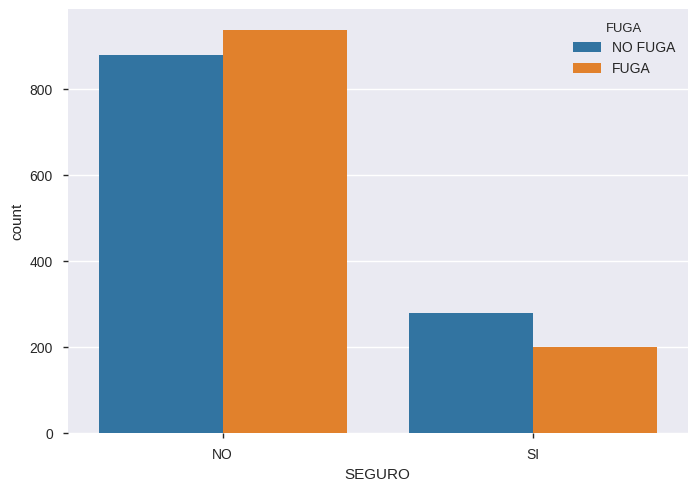

In [163]:
#SEGURO
ax = sns.countplot(x=df_training.SEGURO, hue=df_training.FUGA, data=df_training)
plt.show()

## 2.4 Valores Nulos

In [164]:
#Revisamos cuantos valores nulos tenemos.
df_training.isnull().sum()


GENERO          11
RENTA            0
EDAD             2
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

In [0]:
#Aqui eliminamos los registros que tengan valores nulos para las variables GENERO, NIV_EDUC y E_CIVIL. 
df_training = df_training.dropna(subset=['GENERO', 'NIV_EDUC','E_CIVIL'])
df_validacion= df_validacion.dropna(subset=['GENERO', 'NIV_EDUC','E_CIVIL'])                                 

In [166]:
df_training.isnull().sum()
df_validacion.isnull().sum()

GENERO             0
RENTA             14
EDAD               0
NIV_EDUC           0
E_CIVIL            0
COD_OFI            0
COD_COM            2
CIUDAD             8
D_Marzo            0
D_Abril            0
D_Mayo             0
D_Junio            0
D_Julio            0
D_Agosto           0
D_Septiembre       0
M_MOROSO           2
MONTO              0
SEGURO             8
FUGA            1179
dtype: int64

In [167]:
df_training.shape
#En total, savando los valores nulos, eliminamos 33 registros.

(2261, 19)

# **3. Transformación de variables**

---
A continuacion procederemos a crear el dataframe final para el entrenamiento del modelo.




## 3.1 Eliminacion Variables

---
Dados los resultados del Pandas Profiling tomamos la decision de eliminar las variables de COD_OFI y COD_COM, ya que su dispercion es muy alta para ser variables categoricas. 


In [0]:
#Eliminacion de variables. 
del df_training['COD_OFI']
del df_training['COD_COM']


## 3.2 Filtro Outliers

---
En esta etapa limpiaremos la variable EDAD, ya que como vimos en el EDA, tiene incluso valores negativos, lo cual es ilogico. 


In [169]:
#EDAD
print(df_training.EDAD.value_counts)
df_training = df_training.query('EDAD < 101 & EDAD > 18')
print(df_training.EDAD.value_counts)

<bound method IndexOpsMixin.value_counts of ID
1       39.0
2       49.0
3       39.0
4       36.0
5       44.0
        ... 
2290    43.0
2291    54.0
2292    51.0
2293    42.0
2294    49.0
Name: EDAD, Length: 2261, dtype: float64>
<bound method IndexOpsMixin.value_counts of ID
1       39.0
2       49.0
3       39.0
4       36.0
5       44.0
        ... 
2290    43.0
2291    54.0
2292    51.0
2293    42.0
2294    49.0
Name: EDAD, Length: 2254, dtype: float64>


**Con el filtro de edad aplicado [18,100], perdimos 7 registros.**

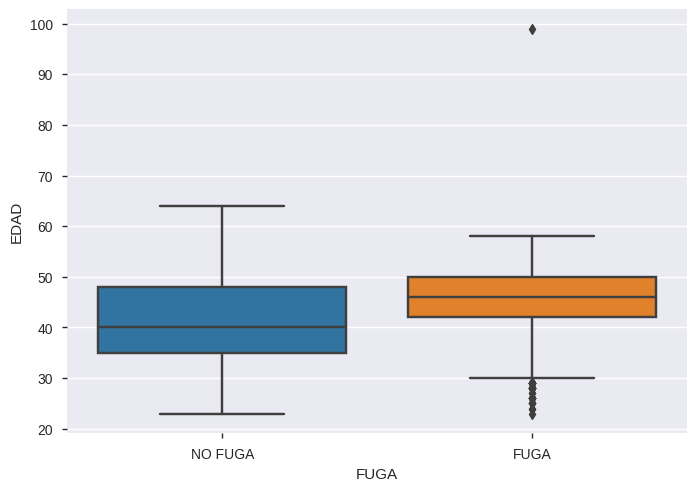

In [170]:
#Con la extraccion de estos datos de la base, quedamos con 2286 registros validos, en un comienzo teniamos 2294, por lo que perdimos 8 registros.
sns.boxplot(x=df_training["FUGA"],y=df_training['EDAD'])
#Se observa que la variable edad es una buena variable predictiva de la fuga.

In [0]:
#EDAD en Validacion. 
df_validacion = df_validacion.query('EDAD < 101 & EDAD > 18')


## 3.2 Encoding

---
A continuacion aplicaremos varios tipos de encoding para variables categoricas. 


In [0]:
#CIUDAD

df_training['CIUDAD'] = np.where(df_training['CIUDAD'].str.contains('SANTIAGO'), 1, 0)
df_validacion['CIUDAD'] = np.where(df_validacion['CIUDAD'].str.contains('SANTIAGO'),1,0)

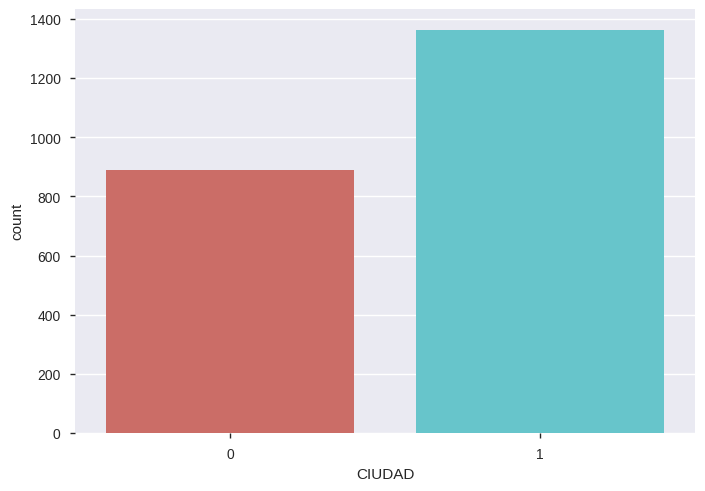

FUGA,FUGA,NO FUGA
CIUDAD,,
0,339,550
1,777,588


In [173]:
#CIUDAD 
#Ahora revisamos la proporcion que queda entre Saniago y el resto de las ciudades. 
sns.countplot(x=df_training['CIUDAD'],palette='hls')
plt.show()
pd.crosstab(df_training['CIUDAD'], 
                          df_training['FUGA'],  
                            margins = False)

In [0]:
#E_CIVIL
#GENERO
#SEGURO
#FUGA

#ENDOCING 1 0

df_training['E_CIVIL'] = np.where(df_training['E_CIVIL'].str.contains('CAS'), 1, 0)
df_training['GENERO'] = np.where(df_training['GENERO'].str.contains('M'), 1, 0)
df_training['SEGURO'] = np.where(df_training['SEGURO'].str.contains('SI'), 1, 0)
df_training['FUGA'] = np.where(df_training['FUGA'].str.contains('NO FUGA'), 0, 1)


In [0]:
#ENCODING 1 0 para Validacion

df_validacion['E_CIVIL'] = np.where(df_validacion['E_CIVIL'].str.contains('CAS'), 1, 0)
df_validacion['GENERO'] = np.where(df_validacion['GENERO'].str.contains('M'), 1, 0)
df_validacion['SEGURO'] = np.where(df_validacion['SEGURO'].str.contains('SI'), 1, 0)

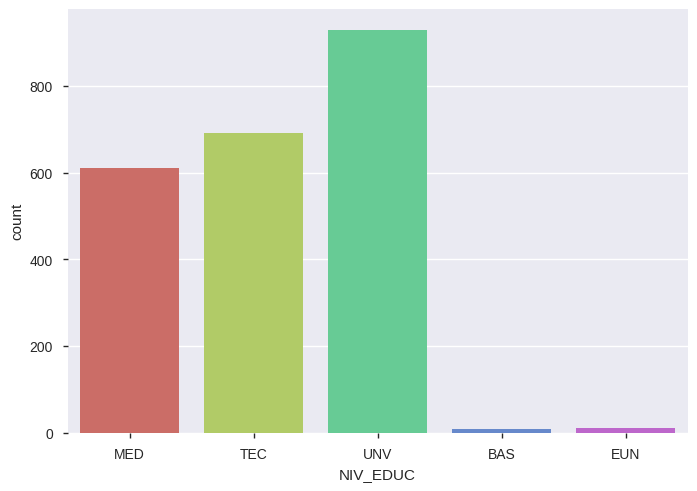

In [176]:
#NIV_EDUC
#Para la variable NIV_EDUC vemos que existen 3 clases predominantes. 
sns.countplot(x=df_training['NIV_EDUC'],palette='hls')
plt.show()

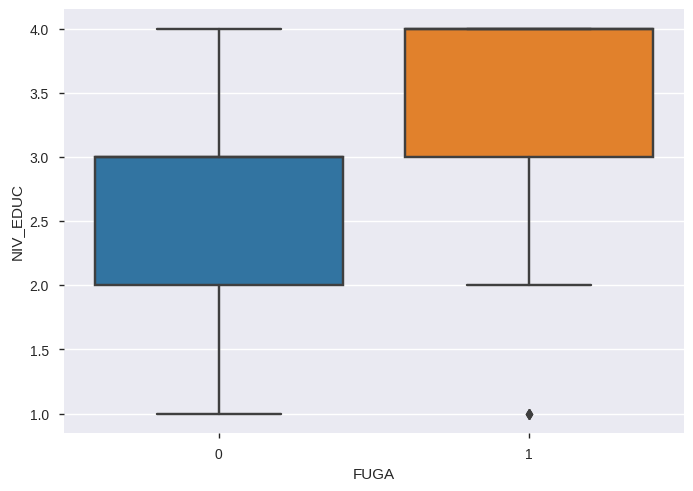

In [177]:
#ENCODING ORDINAL - Para la variable NIV_EDUC crearemos un encoding ordinal de 1 a 5.
#Asumiremos que EUN es un dato mal imputado y que corresponde a UNV, siendo ambos educacion Universitaria. 

df_training['NIV_EDUC'] = df_training['NIV_EDUC'].replace(['BAS', 'MED', 'TEC', 'EUN', 'UNV'],[1, 2, 3, 4, 4])
df_validacion['NIV_EDUC'] = df_validacion['NIV_EDUC'].replace(['BAS', 'MED', 'TEC', 'EUN', 'UNV'],[1, 2, 3, 4, 4])

#Vemos si el nivel educacional dice algo de la fuga. 

sns.boxplot(x='FUGA', y='NIV_EDUC', data = df_training)

#Donde se ve que la variable modificada es una excelente variable predictiva

**Como resultado del Encoding Ordinal que realizamos para NIV_EDUC podemos concluir que los clientes fugados tienen en promedio nivel de educacion mas alto que los no fugados.**

## 3.3 Creacion Variables

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,LEVERAGE1,LEVERAGE2,DIF_LEVERAGE
ID,,,,,,,,,,,,,,,,,,,,


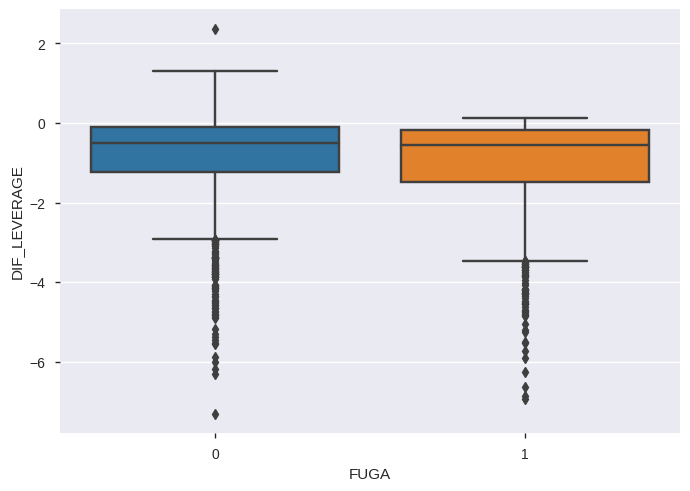

In [178]:
#Crearemos una nueva Variable llamada LEVERAGE, que sera la diferencia entre la deuda al comienzo del periodo y al final. 
#Para cada periodo usaremos 3 meses, dejando fuera a la variable D_Marzo. 

df_training['LEVERAGE1'] = (df_training['D_Julio'] + df_training['D_Agosto'] + df_training['D_Septiembre']) 
df_training['LEVERAGE2'] = (df_training['D_Abril'] + df_training['D_Mayo'] + df_training['D_Junio'])

#No posemoa aplicar logaritmo a la diferencia, ya que no existe el logaritmo de un valor negativo. 
df_training['DIF_LEVERAGE'] = np.sign(df_training['LEVERAGE1'] - df_training['LEVERAGE2']) * np.log(np.abs(df_training['LEVERAGE1'] - df_training['LEVERAGE2'])/df_training['RENTA'] +1)
sns.boxplot(x=df_training['FUGA'], y=df_training['DIF_LEVERAGE'])
#df_training[df_training['DIF_LEVERAGE'].isnull()] pa sapear
df_training['DIF_LEVERAGE'].fillna(0, inplace=True)
df_training[df_training['DIF_LEVERAGE'].isnull()] 

In [179]:
#Crearemos una nueva Variable llamada LEVERAGE, 

df_validacion['LEVERAGE1'] = (df_validacion['D_Julio'] + df_validacion['D_Agosto'] + df_validacion['D_Septiembre']) 
df_validacion['LEVERAGE2'] = (df_validacion['D_Abril'] + df_validacion['D_Mayo'] + df_validacion['D_Junio'])

df_validacion['DIF_LEVERAGE'] = np.sign(df_validacion['LEVERAGE1'] - df_validacion['LEVERAGE2']) * np.log(np.abs(df_validacion['LEVERAGE1'] - df_validacion['LEVERAGE2'])/(df_validacion['RENTA'])+1)


#df_training[df_training['DIF_LEVERAGE'].isnull()] pa sapear
df_validacion['DIF_LEVERAGE'].fillna(0, inplace=True)
df_validacion[df_validacion['DIF_LEVERAGE'].isnull()] 


,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,LEVERAGE1,LEVERAGE2,DIF_LEVERAGE
ID,,,,,,,,,,,,,,,,,,,,,,


In [0]:
#Deuda_Promedio, sera la suma de la deuda del periodo divido 7.
df_training['Deuda_Promedio'] = (df_training.D_Marzo + df_training.D_Abril + df_training.D_Mayo + df_training.D_Junio + df_training.D_Julio + df_training.D_Agosto + df_training.D_Septiembre) / 7
df_validacion['Deuda_Promedio'] = (df_validacion.D_Marzo + df_validacion.D_Abril + df_validacion.D_Mayo + df_validacion.D_Junio + df_validacion.D_Julio + df_validacion.D_Agosto + df_validacion.D_Septiembre) / 7

#Escalamiento LOG de Deuda_Promedio
df_training['Deuda_Promedio'] = np.log(df_training['Deuda_Promedio'] +1)
df_validacion['Deuda_Promedio'] = np.log(df_validacion['Deuda_Promedio']+1)

In [226]:
df_training.describe()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,LEVERAGE1,LEVERAGE2,DIF_LEVERAGE,Deuda_Promedio,EDAD_2,MONTO_2
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2.254000e+03,2.254000e+03,2.254000e+03,2.254000e+03,2254.000000,2254.000000,2254.000000,2254.000000,2.254000e+03,2254.000000,2254.000000,2254.000000,2.254000e+03,2254.000000,2254.000000,2.254000e+03,2.254000e+03
mean,0.604703,12.572055,43.610914,3.137977,0.625111,0.605590,1.530629e+05,2.715875e+05,1.048045e+05,1.912865e+05,571.808341,3592.292813,1965.417924,1.253327,3.473691e+06,0.207187,0.495120,6129.519077,5.676785e+05,-0.973077,10.382277,4.595555e-17,-5.964863e-17
std,0.489023,1.682532,8.057378,0.829464,0.484202,0.488832,4.985412e+05,3.998296e+05,8.782289e+05,6.757727e+05,1082.851027,8984.767569,9951.705790,0.753848,2.288676e+06,0.405381,0.500087,13999.977458,1.196294e+06,1.190297,2.279602,1.000000e+00,1.000000e+00
min,0.000000,5.176150,23.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,0.000000,0.000000,0.000000e+00,-7.300098,0.000000,-2.558018e+00,-1.299307e+00
25%,0.000000,11.516711,39.000000,2.000000,0.000000,0.000000,0.000000e+00,1.800775e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,0.000000,0.000000,192.000000,9.775825e+04,-1.351550,9.827118,-5.722599e-01,-7.749859e-01
50%,1.000000,12.824688,44.000000,3.000000,1.000000,1.000000,0.000000e+00,1.363470e+05,0.000000e+00,5.106000e+03,146.500000,0.000000,58.000000,1.000000,2.600000e+06,0.000000,0.000000,1064.000000,2.906680e+05,-0.519896,10.869204,4.828942e-02,-3.817453e-01
75%,1.000000,13.628813,50.000000,4.000000,1.000000,1.000000,0.000000e+00,3.734120e+05,0.000000e+00,1.753608e+05,640.750000,1486.250000,498.750000,2.000000,4.800000e+06,0.000000,1.000000,5771.750000,6.060905e+05,-0.143016,11.670188,7.929486e-01,5.795093e-01
max,1.000000,15.950188,99.000000,4.000000,1.000000,1.000000,9.458161e+06,5.495534e+06,1.839696e+07,2.063461e+07,11187.000000,88837.000000,249652.000000,3.000000,8.000000e+06,1.000000,1.000000,271406.000000,2.089787e+07,2.373319,14.920114,6.874332e+00,1.977698e+00


In [181]:
df_training.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,LEVERAGE1,LEVERAGE2,DIF_LEVERAGE,Deuda_Promedio
ID,,,,,,,,,,,,,,,,,,,,,
1,1,746476,39.0,2,1,0,0,38292,0,434357,1766,9110,340,2,2000000,0,0,11216,472649,-0.481283,11.143651
2,0,11901,49.0,2,0,1,0,0,0,0,48,0,0,1,7500000,1,0,48,0,0.004025,1.925291
3,1,1651421,39.0,3,1,0,0,604169,0,0,323,26489,2925,1,8000000,0,0,29737,604169,-0.298504,11.413746
4,0,638969,36.0,4,1,1,0,5125,0,198998,94,0,105,1,2600000,0,0,199,204123,-0.276984,10.281542
5,1,860113,44.0,3,1,1,0,11946,0,73959,149,0,272,1,6400000,0,0,421,85905,-0.094753,9.419976


## 3.4 Transformacion Log

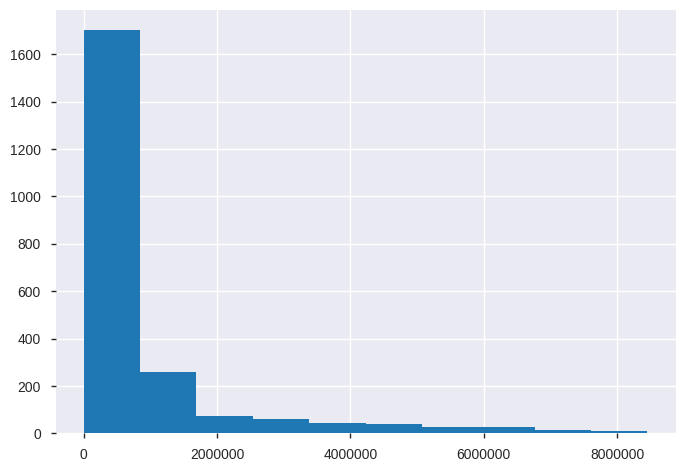

In [182]:
#RENTA
df_training.RENTA.hist()

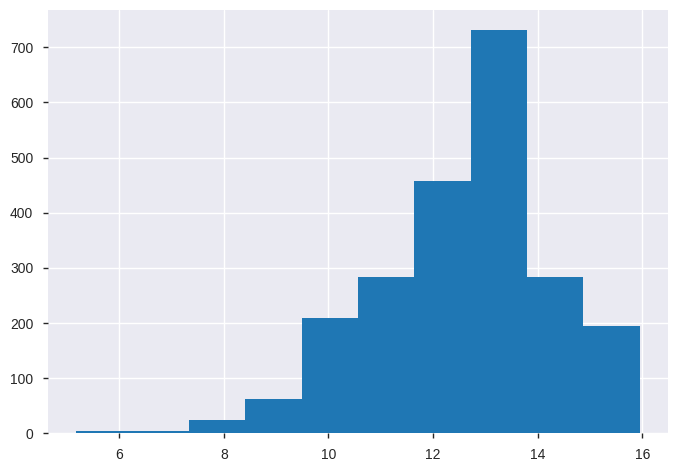

In [183]:
#RENTA
#Crearemos una nueva variables llamada Renta_Log, que es el logaritmo de RENTA.
df_training['RENTA'] = np.log(df_training['RENTA'] +1 )
df_validacion['RENTA'] = np.log(df_validacion['RENTA'] +1)
df_training.RENTA.hist()



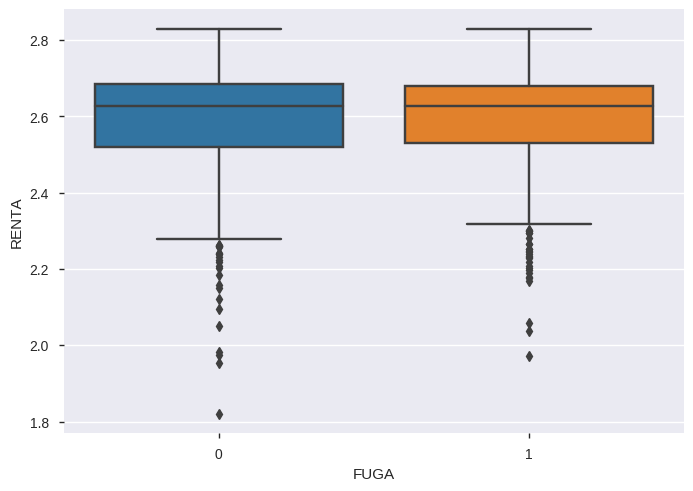

In [184]:
sns.boxplot(x='FUGA', y=np.log(df_training['RENTA']+1), data = df_training)

## 3.6 Escalamiento

In [0]:
#EDAD
#MONTO

#Ahora escalaremos las variables numericas con el mismo escaler que usamos para la base de entrenamiento. 
#z = (x - u) / s

# Promedios (u):
u_edad = df_training.EDAD.mean()
u_monto = df_training.MONTO.mean()

#Desviaciones Standar (s): 
stdv_edad = df_training.EDAD.std()
stdv_monto = df_training.MONTO.std()

#Agremos 2 columnas nuevas: 
df_training['EDAD_2'] = df_training['EDAD']
df_training['MONTO_2'] = df_training['MONTO']

#Hacemos la transformacion:
df_training['EDAD_2'] = (df_training['EDAD_2'] - u_edad) / stdv_edad
df_training['MONTO_2'] = (df_training['MONTO_2'] - u_monto) / stdv_monto


## 3.7 Dataframe Final

In [186]:
df_training.head()


,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,LEVERAGE1,LEVERAGE2,DIF_LEVERAGE,Deuda_Promedio,EDAD_2,MONTO_2
ID,,,,,,,,,,,,,,,,,,,,,,,
1,1,13.523120,39.0,2,1,0,0,38292,0,434357,1766,9110,340,2,2000000,0,0,11216,472649,-0.481283,11.143651,-0.572260,-0.643906
2,0,9.384462,49.0,2,0,1,0,0,0,0,48,0,0,1,7500000,1,0,48,0,0.004025,1.925291,0.668839,1.759231
3,1,14.317147,39.0,3,1,0,0,604169,0,0,323,26489,2925,1,8000000,0,0,29737,604169,-0.298504,11.413746,-0.572260,1.977698
4,0,13.367613,36.0,4,1,1,0,5125,0,198998,94,0,105,1,2600000,0,0,199,204123,-0.276984,10.281542,-0.944589,-0.381745
5,1,13.664820,44.0,3,1,1,0,11946,0,73959,149,0,272,1,6400000,0,0,421,85905,-0.094753,9.419976,0.048289,1.278604


In [187]:
df_validacion.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,LEVERAGE1,LEVERAGE2,DIF_LEVERAGE,Deuda_Promedio
ID,,,,,,,,,,,,,,,,,,,,,,,
2295,1,13.033956,45,4,1,31,119.0,1,0,190591,0,20396,0,0,415,1.0,2700000,0,NaN,415,210987,-0.378486,10.315607
2296,0,14.630160,30,3,0,74,272.0,0,0,47354,0,0,0,0,2,0.0,1900000,0,NaN,2,47354,-0.020750,8.819539
2297,1,13.210724,51,4,1,138,1.0,0,622808,61646,0,268771,235,2913,0,1.0,1100000,1,NaN,3148,330417,-0.469494,11.824993
2298,0,12.958491,41,2,0,138,80.0,1,0,1054,0,392871,1961,0,1022,3.0,3500000,0,NaN,2983,393925,-0.652904,10.945550
2299,1,15.741615,42,2,1,52,91.0,1,0,264308,0,87931,74,0,38,1.0,2000000,0,NaN,112,352239,-0.050037,10.826473


# **4. Modelamiento**

## 4.1 Separamos X e Y.

In [0]:
#Separamos la variables Y de las varuables independientes X, y las transformamos de array a dataframe:

#ENTRENAMIENTO
Y = pd.DataFrame(data=df_training,columns=['FUGA'])
X = pd.DataFrame(data=df_training,columns= ['GENERO','RENTA','EDAD','NIV_EDUC','E_CIVIL','CIUDAD','M_MOROSO','MONTO','SEGURO','DIF_LEVERAGE'])
X.head()

#VALIDACION
Y_val = pd.DataFrame(data=df_validacion,columns=['FUGA'])
X_val = pd.DataFrame(data=df_validacion,columns= ['GENERO','RENTA','EDAD','NIV_EDUC','E_CIVIL','CIUDAD','M_MOROSO','MONTO','SEGURO','DIF_LEVERAGE'])


In [189]:
X.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,DIF_LEVERAGE
ID,,,,,,,,,,
1,1,13.523120,39.0,2,1,0,2,2000000,0,-0.481283
2,0,9.384462,49.0,2,0,1,1,7500000,1,0.004025
3,1,14.317147,39.0,3,1,0,1,8000000,0,-0.298504
4,0,13.367613,36.0,4,1,1,1,2600000,0,-0.276984
5,1,13.664820,44.0,3,1,1,1,6400000,0,-0.094753
6,1,12.705222,40.0,3,1,1,2,7700000,0,-0.471814
7,1,10.265802,45.0,4,1,1,1,2900000,0,-2.938823
8,0,9.355652,41.0,3,0,1,1,2100000,1,-4.070917
9,0,14.928864,33.0,2,1,0,1,1600000,0,-0.032964


In [190]:
X_val.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,DIF_LEVERAGE
ID,,,,,,,,,,
2295,1,13.033956,45,4,1,1,1.0,2700000,0,-0.378486
2296,0,14.630160,30,3,0,0,0.0,1900000,0,-0.020750
2297,1,13.210724,51,4,1,0,1.0,1100000,1,-0.469494
2298,0,12.958491,41,2,0,1,3.0,3500000,0,-0.652904
2299,1,15.741615,42,2,1,1,1.0,2000000,0,-0.050037
2300,0,15.173068,39,2,0,1,0.0,2200000,0,-0.023463
2301,0,7.283448,29,2,0,1,1.0,900000,0,-5.030344
2302,1,13.496579,45,3,0,0,1.0,3800000,1,-0.284381
2303,0,11.579172,40,4,1,0,2.0,1800000,0,-1.478492


## 4.2 Data Mining
----
Se realizara una comparación del desempeño de distintos modelos de clasificación utilizando 10-fold Cross Validation.
Se revisarán las metricas de accuracy, sensitivity (recall) y AUC. Con ello se definirá un modelo de buen desempeño, el que pasaremos a optiimizar sus hiperparámetros a traves de un grid search del modelo campeón. 

In [191]:
#Escalar los datos y verificar nulos
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
type(X)
X.isnull().any()

GENERO          False
RENTA           False
EDAD            False
NIV_EDUC        False
E_CIVIL         False
CIUDAD          False
M_MOROSO        False
MONTO           False
SEGURO          False
DIF_LEVERAGE    False
dtype: bool

In [192]:
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
type(X_val)
X_val.isnull().any()

GENERO          False
RENTA            True
EDAD            False
NIV_EDUC        False
E_CIVIL         False
CIUDAD          False
M_MOROSO         True
MONTO           False
SEGURO          False
DIF_LEVERAGE    False
dtype: bool

In [193]:
X.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,DIF_LEVERAGE
0,0.808520,0.565383,-0.572387,-1.372246,0.774413,-1.239126,0.990701,-0.644049,-0.511206,0.413261
1,-1.236827,-1.894942,0.668987,-1.372246,-1.291300,0.807020,-0.336120,1.759621,1.956158,0.821071
2,0.808520,1.037412,-0.572387,-0.166382,0.774413,-1.239126,-0.336120,1.978137,-0.511206,0.566852
3,-1.236827,0.472938,-0.944799,1.039483,0.774413,0.807020,-0.336120,-0.381830,-0.511206,0.584936
4,0.808520,0.649620,0.048300,-0.166382,0.774413,0.807020,-0.336120,1.278887,-0.511206,0.738067
5,0.808520,0.079164,-0.448249,-0.166382,0.774413,0.807020,0.990701,1.847027,-0.511206,0.421218
6,0.808520,-1.371008,0.172438,1.039483,0.774413,0.807020,-0.336120,-0.250721,-0.511206,-1.651842
7,-1.236827,-1.912069,-0.324112,-0.166382,-1.291300,0.807020,-0.336120,-0.600345,1.956158,-2.603154
8,-1.236827,1.401062,-1.317211,-1.372246,0.774413,-1.239126,-0.336120,-0.818861,-0.511206,0.789989
9,-1.236827,1.506061,-0.572387,-1.372246,-1.291300,0.807020,-0.336120,-0.294424,-0.511206,0.687890


In [194]:
X_val.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,DIF_LEVERAGE
0,0.808520,0.274588,0.172438,1.039483,0.774413,0.807020,-0.336120,-0.338127,-0.511206,0.499642
1,-1.236827,1.223490,-1.689623,-0.166382,-1.291300,-1.239126,-1.662942,-0.687752,-0.511206,0.800252
2,0.808520,0.379672,0.917262,1.039483,0.774413,-1.239126,-0.336120,-1.037376,1.956158,0.423167
3,-1.236827,0.229726,-0.324112,-1.372246,-1.291300,0.807020,2.317523,0.011498,-0.511206,0.269045
4,0.808520,1.884222,-0.199975,-1.372246,0.774413,0.807020,-0.336120,-0.644049,-0.511206,0.775642
5,-1.236827,1.546235,-0.572387,-1.372246,-1.291300,0.807020,-1.662942,-0.556642,-0.511206,0.797973
6,-1.236827,-3.143940,-1.813761,-1.372246,-1.291300,0.807020,-0.336120,-1.124783,-0.511206,-3.409373
7,0.808520,0.549605,0.172438,-0.166382,-1.291300,-1.239126,-0.336120,0.142607,1.956158,0.578720
8,-1.236827,-0.590244,-0.448249,1.039483,0.774413,-1.239126,0.990701,-0.731455,-0.511206,-0.424707
9,0.808520,0.815433,-0.199975,-1.372246,-1.291300,0.807020,0.990701,0.098904,-0.511206,0.039171


## 4.3 Comparacion de Modelos

In [0]:
#Comparación de modelos

models = []

models.append(("LogisticRegression",sklearn.linear_model.LogisticRegression()))
models.append(("SVC",sklearn.svm.SVC()))
models.append(("RandomForest",sklearn.ensemble.RandomForestClassifier()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsClassifier()))
models.append(("MLPClassifier",sklearn.neural_network.MLPClassifier()))
models.append(("XGBoost",xgb.XGBClassifier()))  
models.append(("DecisionTree",sklearn.tree.DecisionTreeClassifier()))

# Segun Accuracy
results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             X, 
                             Y,  
                             cv=10, 
                             scoring='accuracy',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

In [196]:
models

[('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_e

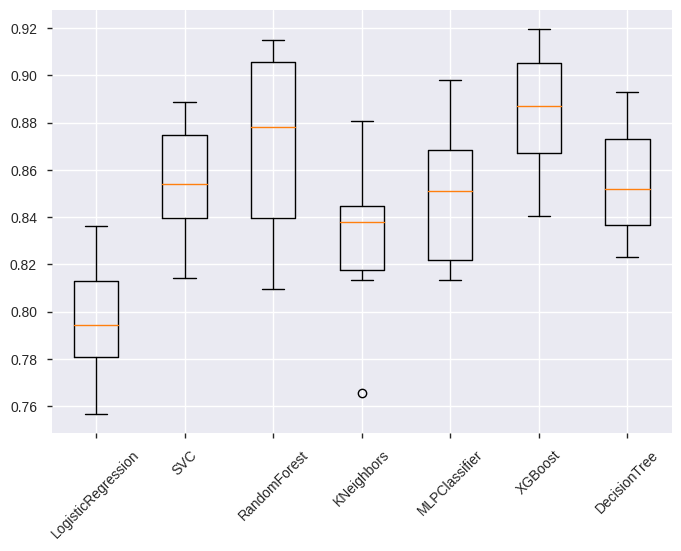

In [197]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [0]:
#Segun Sensitivity
results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             X, 
                             Y,  
                             cv=10, 
                             scoring='recall',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

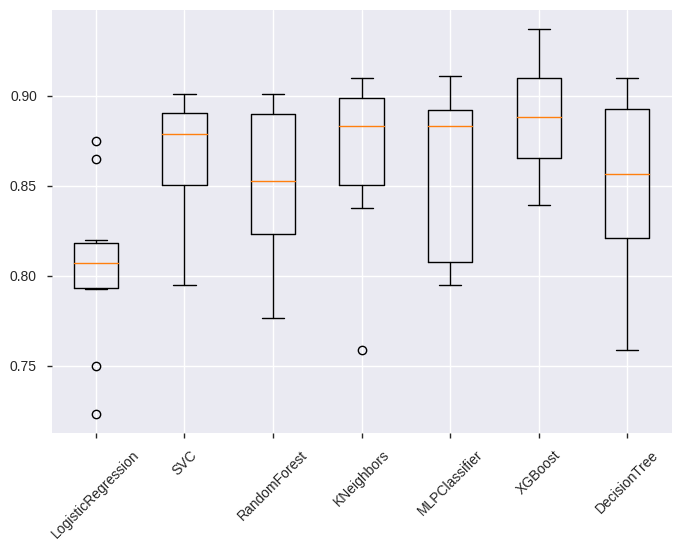

In [199]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [0]:
#Segun AUC
results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             X, 
                             Y,  
                             cv=10, 
                             scoring='roc_auc',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

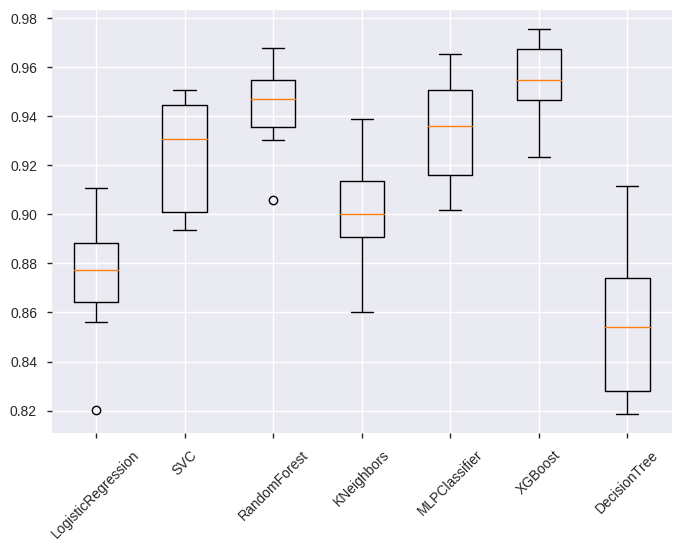

In [201]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

Nos quedamos con Extreme Gradient Boosting por tener un buen desempeño tanto en accuracy 87.5% , como por detectar bien la clase fuga con un recall de 89% y con un AUC de 0.95 bajo la curva ROC. 

In [0]:
x_train, x_test,y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    Y,
    test_size=0.30,
    random_state = 3,
    stratify = Y #Solo para generalizar el problema de fuga ya que la base es balanceada
)

In [0]:
fuga_dmatrix = xgb.DMatrix(data=X, label=Y)

## 4.3 Grid Search

In [204]:
# Grid Search (optimización de hiperparámetros) para XGBoost
parameters = {#'base_score' : [0.3, 0.5, 0.7], 
              'learning_rate' : [0.01,0.05,0.1], # Velocidad o salto de reducción de error
              'max_depth' : [4,5,6] , # Maxima profundidad del arbol
              'colsample_by_tree': [0.3, 0.5, 0.7], # % Features usados por arbol
              'subsample': [1], # % ejemplos usados por arbol
              'n_estimators': [50,100,200],
              'min_child_weight': [1, 5, 10],
              'gamma': [0, 0.5, 1], #Regularizacion opcion 1
              #'alpha' : [0, 0.5, 1], # Regularización L1
              #'lambda' : [0, 0.5, 1] # Regularización L2
              'seed' : [3] 
}

grid_Search = sklearn.model_selection.GridSearchCV(xgb.XGBClassifier(), 
                                                    parameters, 
                                                    n_jobs=-1,
                                                    cv = 3,
                                                    scoring = 'roc_auc',
                                                   )

grid_Search.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_by_tree': [0.3, 0.5, 0.7],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
   

In [205]:
grid_Search.best_params_

{'colsample_by_tree': 0.3,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'seed': 3,
 'subsample': 1}

## 4.4 Feature Important List

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


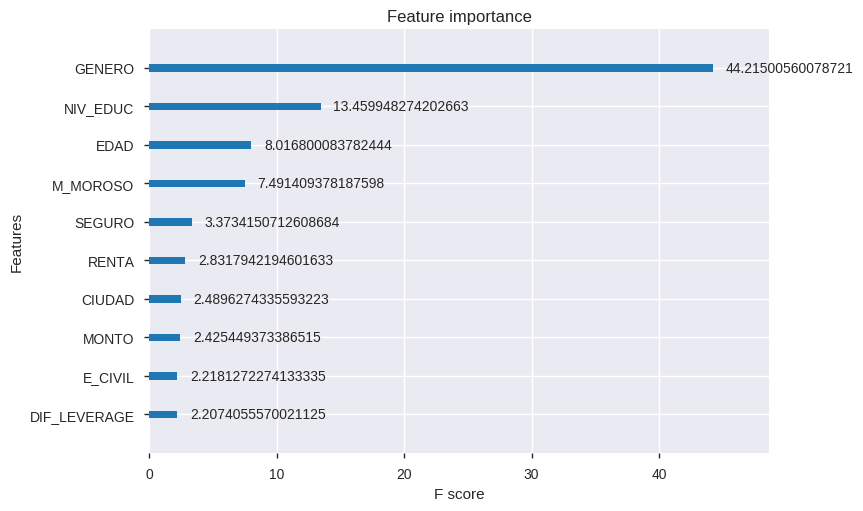

In [206]:
#View Model
# fit model no training data
model = xgb.XGBClassifier(base_score = 0.3,
                      gamma= 0,
                      learning_rate = 0.1,
                      max_depth = 6,
                      min_child_weight = 1,
                      n_estimators = 50,
                      seed =3)
model.fit(x_train, y_train)

#xgb.plot_tree(model, num_tree = 1, rankdir = "LR")

# feature importance
# plot feature importance
xgb.plot_importance(model, importance_type = 'gain')
plt.show()

In [207]:
pd.DataFrame(grid_Search.cv_results_).head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_by_tree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_seed,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.262360,0.136082,0.005384,0.000682,0.3,0,0.01,4,1,50,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.913764,0.919485,0.923389,0.918873,0.003954,667
1,0.137180,0.002488,0.007454,0.002073,0.3,0,0.01,4,1,100,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.918726,0.924978,0.930581,0.924754,0.004844,652
2,0.249492,0.000468,0.007249,0.000174,0.3,0,0.01,4,1,200,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.937257,0.938215,0.941851,0.939105,0.001979,529
3,0.068531,0.000726,0.004389,0.000136,0.3,0,0.01,4,5,50,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.907751,0.902315,0.924296,0.911449,0.009343,718
4,0.126090,0.002603,0.005443,0.000026,0.3,0,0.01,4,5,100,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.925503,0.919601,0.937518,0.927538,0.007451,640
5,0.252747,0.011523,0.010120,0.003339,0.3,0,0.01,4,5,200,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.936458,0.934194,0.942010,0.937553,0.003282,547
6,0.067635,0.001325,0.004369,0.000018,0.3,0,0.01,4,10,50,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.909443,0.897874,0.918033,0.908451,0.008255,724
7,0.123557,0.001945,0.005264,0.000209,0.3,0,0.01,4,10,100,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.922248,0.915530,0.931807,0.923194,0.006675,661
8,0.233944,0.003051,0.007137,0.000264,0.3,0,0.01,4,10,200,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.932792,0.930334,0.938041,0.933721,0.003212,580
9,0.086628,0.007378,0.004892,0.000631,0.3,0,0.01,5,1,50,3,1,"{'colsample_by_tree': 0.3, 'gamma': 0, 'learni...",0.923307,0.926800,0.933222,0.927771,0.004107,637


In [0]:
resultado = grid_Search.predict(x_test) #Prediccion base con punto de corte al 50%
proba = grid_Search.predict_proba(x_test) #Probabilidad de fuga

In [209]:
print(classification_report(resultado, y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       321
           1       0.92      0.87      0.89       356

    accuracy                           0.89       677
   macro avg       0.89      0.89      0.89       677
weighted avg       0.89      0.89      0.89       677



In [210]:
print(proba)
type(proba)

[[0.9914963  0.00850368]
 [0.88956976 0.11043023]
 [0.8422847  0.15771534]
 ...
 [0.925451   0.074549  ]
 [0.4077586  0.5922414 ]
 [0.9840343  0.01596568]]


numpy.ndarray

Ahora con este modelo entrenado veremos la predicción en la base de validación, en la que no tiene label, para poder realizar el modelo de decisión en base al costo/utilidad.

In [0]:
Y_val["FUGA"] = grid_Search.predict(X_val)
proba_val = grid_Search.predict_proba(X_val)

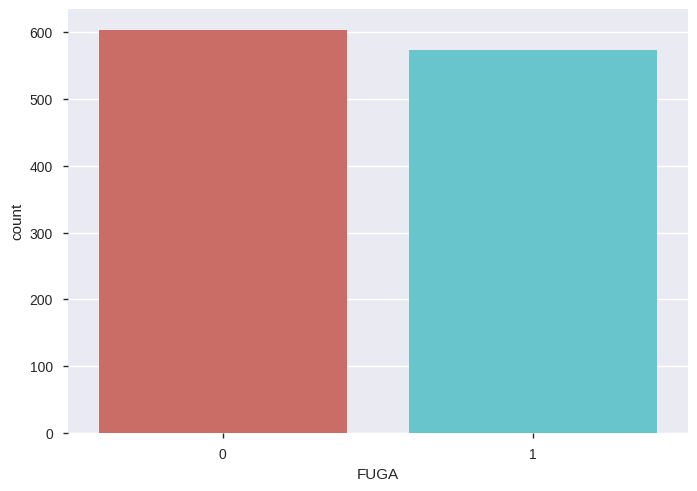

0    604
1    574
Name: FUGA, dtype: int64

In [256]:
#Revisaremos si la variable independiente esta balanceada. 
sns.countplot(x=Y_val["FUGA"],palette='hls')
plt.show()
Y_val['FUGA'].value_counts()

In [67]:
Y['FUGA'].value_counts()

0    1138
1    1116
Name: FUGA, dtype: int64

In [0]:
1116/(1116+1138)

0.4951197870452529

In [211]:
574/(574+604)

0.4872665534804754

Lo de abajo no aplica porque las proporciones de fugados tanto en la base fuga como en la de validacion son iguales.

Para poder realizar la selección correcta, debemos volver a estratificar la base de test, evaluamos 3 alternativas para poder ralizar esta tarea.

1.- Desbalancear la muestra original de entrenamiento en un porcentaje que mantanga la proporción estimada de la base de validación. El problema de esta técnica es que los modelos prefieren una base balanceada de entrenamiento, así que no tendría mucho sentido empobrecer el entrenamiento dandole una base desbalanceada si ya se cuenta con una balanceada.

2.- Subsampling de la base de testeo. Habíamos realizado un train test split de un 70/30, por lo que la cantidad de casos en el conjunto de test es de un X. Como esos casos se encuentran en la misma proporcón que la base general, se pueden sacar casos fugados para llegar a la proporción de validación. El problema es que la base es muy pequeña por lo que podríamos perder escenarios importantes de la validación de los fugados.

3.- Oversampling rescatando casos de la base de entrenamiento: Esto es , mantener los casos de fuga de la base de test, pero además añadir casos no-fugados desde la base de training. Problema information leak

4. Añadir muestras sinteticas de casos de no-fugados. Utilizando SMOTE

In [0]:
#from imblearn.over_sampling import SMOTE
# RandomOverSampler
  # With over-sampling methods, the number of samples in a class
  # should be greater or equal to the original number of samples.
# SMOTE
#sampler = SMOTE(ratio={1: 1927, 0: 300},sampling_strategy= 'not minority' ,random_state=3)
#X_rs, y_rs = sampler.fit_sample(x_test, y)
#print('SMOTE {}'.format(Counter(y_rs)))
#plot_this(X_rs,y_rs)


# **5. Modelo de decisión**



---
Con el modelo anterior tenemos un probabilidad de fuga bastante creible. En esta estapa trataremos de encontrar el punto de corte optimo para la P(x) ~ Y' tal que si se tiene una función de utilidad U: x,P(x) -> $, entonces MAX(U(x, y_hat)). Notar que para esta tarea se está asumiendo que tenemos una capacidad de retención del 100% de los clientes, cosa que es una simplicficación de la realidad.

En particular se sabe que la matriz de costo/beneficio tiene la siguiente estructura.


In [212]:
mat_costo_ben = np.array([[0, -5000],[-100,1000]]) #En el orden entregado por sklearn
print(mat_costo_ben)
type(mat_costo_ben)

[[    0 -5000]
 [ -100  1000]]


numpy.ndarray

In [213]:
mat_confusion =  sklearn.metrics.confusion_matrix(resultado, y_test)
print(mat_confusion)
type(mat_confusion)
Beneficio = np.sum(np.multiply(mat_costo_ben, mat_confusion)) #esto hay que concvertirlo en función con def wea 
print(Beneficio)
salida = pd.DataFrame(proba)

[[294  27]
 [ 48 308]]
168200


In [214]:
salida.head(10)
#salida[1].head(10)

,0,1
0,0.991496,0.008504
1,0.889570,0.110430
2,0.842285,0.157715
3,0.464499,0.535501
4,0.021279,0.978721
5,0.069147,0.930853
6,0.026064,0.973936
7,0.114093,0.885907
8,0.459714,0.540286
9,0.990106,0.009894


In [0]:
salida = pd.DataFrame(proba)

def Utilidad(corte,probabilidad,y_test):
    mat_costo_ben = np.array([[0, -5000],[-100,1000]]) 
    y_prima = probabilidad.apply(lambda x: 1 if x >= corte else 0)
    mat_confusion =  sklearn.metrics.confusion_matrix(y_prima, y_test)
    return np.sum(np.multiply(mat_costo_ben,mat_confusion)) 

def Perdida(corte,*args):
    probabilidad, y_test = args[0], args[1]
    mat_costo_ben = np.array([[0, 5000],[100,-1000]]) 
    y_prima = probabilidad.apply(lambda x: 1 if x >= corte else 0)
    mat_confusion =  sklearn.metrics.confusion_matrix(y_prima, y_test)
    return np.sum(np.multiply(mat_costo_ben,mat_confusion)) 

In [219]:
print(Utilidad(0.91133239,salida[1],y_test))

-511600


In [0]:
from scipy import optimize

argumentos = {'probabilidad': salida[1], 
              'y_test': y_test}
argumentos_2 = (salida[1], y_test)           

In [291]:
punto_corte= optimize.fmin(func = Perdida,x0 =0.5 ,args=argumentos_2 )
print(punto_corte)

Optimization terminated successfully.
         Current function value: -311900.000000
         Iterations: 20
         Function evaluations: 45
[0.04296875]


In [241]:
seq = np.linspace(0,1,1001)
U_fun = np.zeros(1001)
print(seq)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


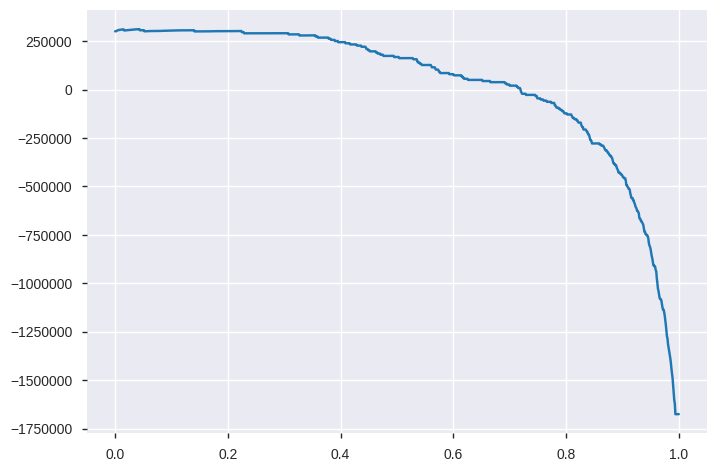

In [250]:
seq = np.linspace(0,1000,1001, dtype = 'int16')
U_fun = np.zeros(1001)
for i in np.nditer(seq):
  U_fun[i] = Utilidad(i/1000,argumentos_2[0], y_test =argumentos_2[1])

plt.plot(seq/1000, U_fun)

# **7. Base Resultado**

In [0]:

df_salida = pd.read_csv('/gdrive/My Drive/MIT/BASEFUGA_VALIDACION.csv',sep=',')

#Seteamos el ID de la base de entrenamiento como indice para separar las variables dependientes de la indepentiente.
df_salida.set_index('ID', inplace = True)
df_salida['FUGA'] = Y_val['FUGA']

In [0]:
indices = Y_val.index.values
df_salida.loc[indices,'P_FUGA'] = proba_val[:,1]

0.0429687499999996

In [300]:
df_salida['FUGA_PRIMA'] = np.where(df_salida.P_FUGA > punto_corte[0], 1, 0)
df_salida.head(5)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,P_FUGA,FUGA_PRIMA
ID,,,,,,,,,,,,,,,,,,,,,
2295,M,457693.0,45,UNV,CAS,31,119.0,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,NO,1.0,0.945353,1
2296,F,2258382.0,30,TEC,SOL,74,272.0,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,NO,0.0,0.002242,0
2297,M,546190.0,51,UNV,CAS,138,1.0,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,SI,1.0,0.923662,1
2298,F,424424.0,41,MED,SOL,138,80.0,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,NO,0.0,0.332748,1
2299,M,6862726.0,42,MED,CAS,52,91.0,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,NO,1.0,0.954503,1


In [0]:
df_salida.to_csv('/gdrive/My Drive/MIT/BASEFUGA_VALIDACION_SALIDA.csv')

# **6. Clustering (KMeans)**

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


df_kmeans = df_training[['RENTA','EDAD_2','MONTO_2']]
df_kmeans

,RENTA,EDAD_2,MONTO_2
ID,,,
1,13.523120,-0.572260,-0.643906
2,9.384462,0.668839,1.759231
3,14.317147,-0.572260,1.977698
4,13.367613,-0.944589,-0.381745
5,13.664820,0.048289,1.278604
...,...,...,...
2290,12.230970,-0.075820,-1.037146
2291,11.161039,1.289388,-0.731292
2292,13.495143,0.917058,0.317349


In [0]:
#Kmeans
X_k = np.array(df_training[['RENTA','EDAD_2','MONTO_2']])
y_k = np.array(df_training['FUGA'])
X_k.shape

(2254, 3)

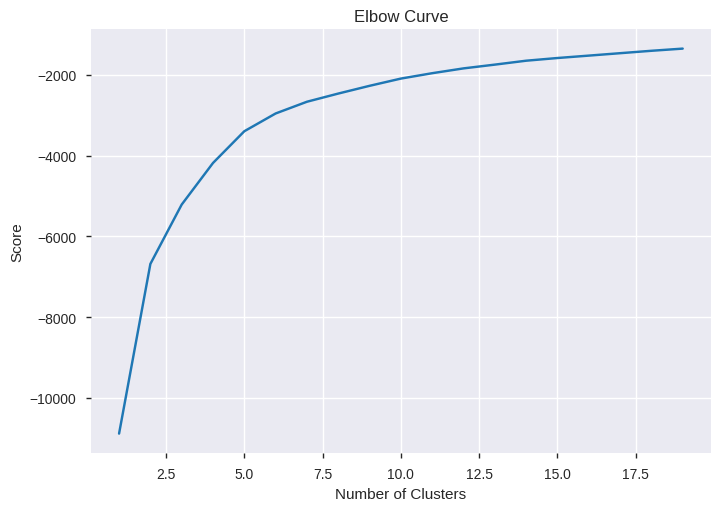

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_k).score(X_k) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [0]:
#Cluster the data
kmeans_2 = KMeans(n_clusters=5, random_state=0).fit(df_kmeans)
labels_2 = kmeans_2.labels_

df_kmeans['clusters'] = labels_2
df_kmeans.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,RENTA,EDAD_2,MONTO_2,clusters
ID,,,,
1,13.523120,-0.572260,-0.643906,2
2,9.384462,0.668839,1.759231,3
3,14.317147,-0.572260,1.977698,1
4,13.367613,-0.944589,-0.381745,2
5,13.664820,0.048289,1.278604,1
6,12.705222,-0.448150,1.846618,1
7,10.265802,0.172399,-0.250665,3
8,9.355652,-0.324040,-0.600212,3
9,14.928864,-1.316919,-0.818679,4


In [0]:
C = kmeans_2.cluster_centers_
C

array([[12.7253411 ,  0.72152685, -0.51162325],
       [13.7413332 ,  0.29650913,  1.53985128],
       [12.68063018, -1.18072053, -0.44955521],
       [10.14145254,  0.2668201 ,  0.08654503],
       [15.02119225, -0.61992183, -0.38332361]])

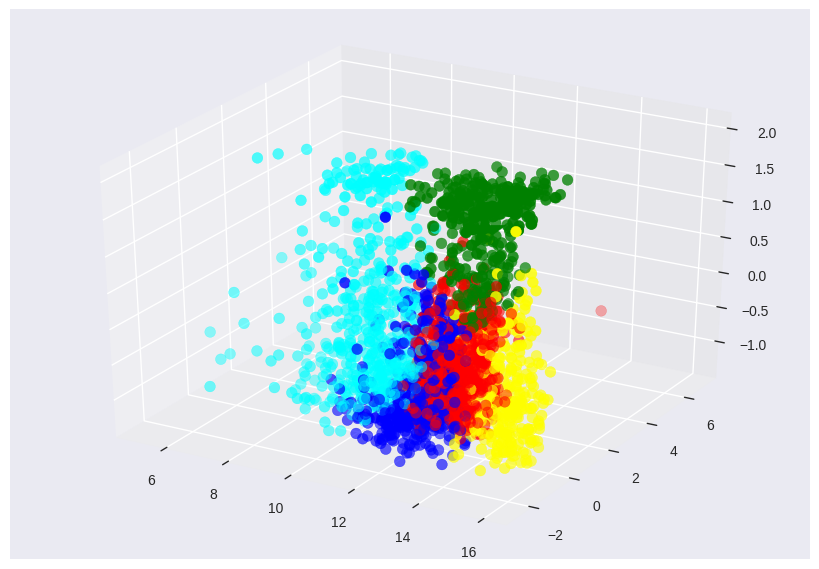

In [0]:
#VISUALIZACION 3D
from mpl_toolkits.mplot3d import Axes3D

colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels_2:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_kmeans.RENTA, df_kmeans.EDAD_2, df_kmeans.MONTO_2, c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)